## Principal Component Analysis

In this lesson we will investigate Principal Component Analysis (PCA), which is a powerful technique for manipulating data. So far we have only considered supervised learning algorithms, where labels are predicted based on training data. For unsupervised learning algorithms we do not use labels, but rather investigate relationships within the data features. ###Cluster analysis is another class of unsupervised learning algorithms, which is particularly useful for  classification problems.### This will be considered next week.

PCA can be used for unsupervised learning, but it can also be used for visualization, dimensionality reduction and noise filtering. These will be briefly discussed below.

PCA treats the $n$ samples and $m$ features of the data as an $n\times m$ matrix or table, and uses a linear algebra technique known as Singular Value Decomposition to split this into $m$ matrices which are ordered by the amount of variation they account for in the original matrix. As PCA deals with the variance of a matrix, the data should first be normalized so that each column has zero mean. However, the `sklearn` function `PCA` takes this into account, so this normalization does not need to occur.


We first introduct the standard libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

### A simple two-dimensional dataset

To introduce PCA we create a simple two-dimensional data set that approximately lies on a straight line.

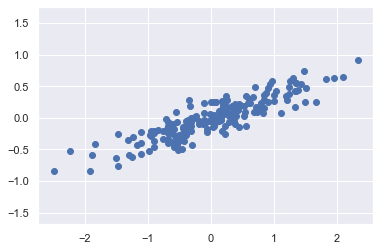

In [2]:
rng = np.random.RandomState(1) # initializes a random number generator
# rand(n,m) creates a (n,m) matrix with random numbers uniformly distributed in [0,1)
# randn(n,m,mu,var) creates a (n,m) matrix with random numbers with mean mu and variance var
# default values are mu=0 and var=1
# dot multiplies a (p,q) and (q,r) matrix to produce a (p,r) matrix and T is the transpose
# mean slope of the resultant line is dependent on the random seed
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1]) # scatter plot of dataset
plt.axis('equal'); # keep the scale of the axes equal

PCA has the same calling structure as other `sklearn` routines, so we first import the library, then instantatiate it with the chosen hyperparameters and finally fit the data to the model.

Since this is unsupervised learning, there are two things we should note about fitting the data: 
1. We don't split the data into training and testing sets.
2. We don't have target values.

The argument for `PCA` in this case is the number of components to calculate. This must be an integer less than or equal to the number of features or a floating point number between 0 and 1. We will consider the floating point option later. If `n_components` is not specified, it is set equal to the number of features. Here we specify the `n_components=2`, which is equal to the number of features.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #instantatiate PCA to calculate two PCs 2 columns
pca.fit(X) # fit our data to the model

PCA(n_components=2)

We can now investigate the output of `PCA`. The first output of interest are the principal components. These are vectors in the feature space which are chosen to account for the primary variation in the data. The first principal component has a slope of approximately 1/3, which is the approximate slope of the scatter plot above. This is consistent with the observation that most of the variation in the data points occurs along the line $y \approx x/3$. The second principal component is chosen as a vector which is orthogonal (at right-angles) to the first principal component. Since we are working in two-dimensions, there is only one direction (to within a plus or minus) which satisfies this. `PCA` normalizes the principal components so that their length is one, which can be seen by calculating their norm (without any other arguments this is the length of the vector).

In [4]:
for ord, vector in zip(['First','Second'], pca.components_): #loop through the array of strings and the PCs
    print('{0} PC is: {1}'.format(ord,vector)) # print the PC
    print('Length of vector is: {0}'.format(np.linalg.norm(vector))) # print the length of the PC

First PC is: [-0.94446029 -0.32862557]
Length of vector is: 1.0
Second PC is: [-0.32862557  0.94446029]
Length of vector is: 1.0


The second output is the explained variance or the explained variance ratio. The explained variance is the contribution of that principal component to the variance of the data matrix. Recall that the principal components are ordered based on their contribution to the variance of the data matrix, therefore the explained variance decreases with each principal component. An alternative version of this is the explained variance ratio, which is a rescaling of the explained variance such that the contributions sum to one. Hence for this example 97.6% of the variance can be explained by the first principal component, and the remaining 2.4% by the second principal component.

In [5]:
#loop through the array of strings and the explained variance and explained variance ratio for the PCs
for ord, var, ratio in zip(['First','Second'], pca.explained_variance_, pca.explained_variance_ratio_):
    # print the explained variance and explained variance ratio for each PC
    print('{0} PC variance and variance ratio is: {1} {2}'.format(ord, np.round(var,3), np.round(ratio,3)))

First PC variance and variance ratio is: 0.763 0.976
Second PC variance and variance ratio is: 0.018 0.024


In [6]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

The explained variance can also be considered geometrically. If we scale the principal component vectors so that they have length proportional to the standard deviation (the square root of the variance), then we can expect a particular percentage of the data points to lie within the limits of that vector. If the vector is three times the standard deviation then, assuming points are normally distributed, 99.8% of the data points should lie within an ellipse whose major and minor axes are the scaled principal components. This is shown in the figure below. In higher dimensions this will be an ellipsoid.

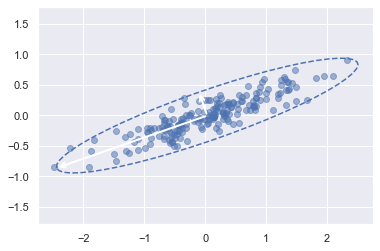

In [7]:
def draw_vector(v0, v1, ax=None):
    '''Function to draw a vector from v0 to v1 with an arrow head'''
    ax = ax or plt.gca() # if ax is specified use these axes, otherwise get the current axes
    # define a dictionary with the properties of the arrow, '->' is a one-sided arrow
    arrowprops = dict(arrowstyle='->', linewidth=2) 
    # draw a line from v0 to v1 with the arrow properties, string to annotate figure is empty
    ax.annotate('', v1, v0, arrowprops=arrowprops) 

plt.scatter(X[:,0], X[:,1], alpha=0.5) # scatter plot of data and specify transperancy
# loop over the explained variance and the PCs
for length, vector in zip(pca.explained_variance_, pca.components_): 
    v = vector * 3 *np.sqrt(length) # define a vector which is 3 times the standard deviation
    draw_vector(pca.mean_, pca.mean_ + v) # draw the vector with an arrowhead
theta = np.linspace(0,2*np.pi) # define an array from 0 to 2*pi
# create a zero array of size (length of theta, 2) which will have 
# the ellipse coordinates
Y = np.zeros((len(theta),2)) 
# first component of Y is the x coordinate which is proportional to the
# standard deviation of the first PC
Y[:,0] = 3*np.sqrt(pca.explained_variance_[0])*np.cos(theta)
# first component of Y is the y coordinate which is proportional to the
# standard deviation of the first PC
Y[:,1] = 3*np.sqrt(pca.explained_variance_[1])*np.sin(theta)
Z = pca.inverse_transform(Y) # transform Y from component space to feature space
plt.plot(Z[:,0],Z[:,1],'--') # plot Z in component space as a dotted line
plt.axis('equal'); # make the axis scales equals       return original data

In [8]:
X[:,0]

array([-6.25301618e-01,  9.60695033e-01, -5.98543385e-01, -2.22805938e+00,
       -4.61430060e-01, -9.58929028e-01, -6.73079909e-01,  1.30501861e+00,
        3.74545597e-01, -1.82628627e+00,  6.68262284e-01, -5.82646676e-01,
       -4.18128976e-01,  1.72209371e-01,  3.77116687e-01, -6.79396230e-01,
        1.03148960e+00,  3.36041799e-01,  7.05745985e-01,  8.39511547e-01,
        1.49882898e+00,  2.88356638e-01, -5.02935011e-01,  1.47921067e+00,
       -4.44382429e-01, -5.33464228e-01, -6.16229422e-01,  7.46598965e-02,
       -1.13637011e-01, -2.00717298e-02,  1.89582967e-01,  9.38466103e-01,
       -3.66697989e-01, -8.93528486e-01, -1.31759571e+00, -3.81802782e-01,
       -5.13790216e-01,  9.03737934e-01, -4.38875079e-01, -5.94170907e-01,
       -3.12943931e-01, -3.00229089e-01, -5.99239320e-01,  2.20370036e-01,
        5.25164844e-01,  5.56625011e-01,  1.35428157e+00, -6.83159806e-01,
       -1.23325109e-01, -3.13175458e-01, -2.48838277e+00,  1.24996586e+00,
        1.76764431e-01, -

In [9]:
X[:,1]

array([-1.70063657e-01,  5.90900597e-01, -4.02593393e-01, -5.32576740e-01,
       -4.98867244e-01, -2.69331024e-01, -3.38308547e-01,  5.91357846e-01,
       -9.85442049e-02, -4.06170254e-01,  3.36877396e-01, -1.77369217e-01,
       -3.73811389e-01,  2.64668836e-01,  1.88442969e-01, -1.31601978e-01,
        4.25550018e-01,  3.90982721e-02,  4.88730649e-01,  1.52125872e-01,
        4.71380809e-01,  3.31334714e-02, -3.68665426e-01,  7.40445724e-01,
       -1.65019364e-01, -6.02221911e-02, -2.11783922e-01, -6.14321077e-02,
        7.32877678e-02,  6.09744586e-02,  1.99769369e-01,  5.41731132e-01,
       -3.64971376e-02, -3.72814013e-01, -3.57581073e-01, -2.01252465e-01,
       -5.05974086e-01,  2.49518260e-01, -1.50648130e-01, -9.41224109e-02,
       -6.57312966e-04, -4.22050272e-01, -2.60398180e-01,  2.03914415e-01,
        1.87026363e-01, -1.33745094e-01,  5.47397422e-01, -3.94693187e-01,
       -1.04266539e-01, -6.98306619e-02, -8.44571249e-01,  5.85738115e-01,
        1.10730208e-01, -

In [10]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

The datapoints can also be viewed transformed into component space. If we denote each of the principal components as $P_1$ and $P_2$, then the values in component space for the $j^{th}$ sample, $X_j$, are $Y_{1,j}$, $Y_{2,j}$, where

$$
X_j = Y_{1,j}P_1 + Y_{2,j}P_2.
$$

We refer to $Y_{1,j}$ as *Component 1* and $Y_{2,j}$ as *Component 2*. These are the amplitudes of the principal components. This component space is just a translated, rotated and rescaled version of the original feature space. Now the ellipse which bounds the data points has the x-axis as the major axis and the y-axis as the minor axis.

In [11]:
Z

array([[-2.44068290e+00, -8.64978330e-01],
       [-2.43750707e+00, -8.08658335e-01],
       [-2.39375719e+00, -7.39127198e-01],
       [-2.31015162e+00, -6.57526618e-01],
       [-2.18806316e+00, -5.65196475e-01],
       [-2.02949650e+00, -4.63652827e-01],
       [-1.83705531e+00, -3.54563017e-01],
       [-1.61389946e+00, -2.39718297e-01],
       [-1.36369316e+00, -1.21004415e-01],
       [-1.09054480e+00, -3.70649079e-04],
       [-7.98939459e-01,  1.20202198e-01],
       [-4.93665296e-01,  2.38734322e-01],
       [-1.79734901e-01,  3.53279431e-01],
       [ 1.37696996e-01,  4.61956696e-01],
       [ 4.53418173e-01,  5.62981639e-01],
       [ 7.62244497e-01,  6.54695434e-01],
       [ 1.05910505e+00,  7.35592143e-01],
       [ 1.33912539e+00,  8.04343444e-01],
       [ 1.59770758e+00,  8.59820442e-01],
       [ 1.83060572e+00,  9.01112208e-01],
       [ 2.03399563e+00,  9.27540730e-01],
       [ 2.20453765e+00,  9.38672054e-01],
       [ 2.33943148e+00,  9.34323404e-01],
       [ 2.

In [12]:
Z[:,0]

array([-2.4406829 , -2.43750707, -2.39375719, -2.31015162, -2.18806316,
       -2.0294965 , -1.83705531, -1.61389946, -1.36369316, -1.0905448 ,
       -0.79893946, -0.4936653 , -0.1797349 ,  0.137697  ,  0.45341817,
        0.7622445 ,  1.05910505,  1.33912539,  1.59770758,  1.83060572,
        2.03399563,  2.20453765,  2.33943148,  2.43646217,  2.49403648,
        2.51120904,  2.48769788,  2.42388905,  2.32083029,  2.18021382,
        2.00434856,  1.79612221,  1.55895385,  1.29673777,  1.01377955,
        0.71472536,  0.40448566,  0.08815458, -0.22907373, -0.54199041,
       -0.84545735, -1.13449164, -1.40434736, -1.65059347, -1.86918661,
       -2.05653751, -2.20956985, -2.32577086, -2.40323252, -2.4406829 ])

In [13]:
Z[:,1]

array([-8.64978330e-01, -8.08658335e-01, -7.39127198e-01, -6.57526618e-01,
       -5.65196475e-01, -4.63652827e-01, -3.54563017e-01, -2.39718297e-01,
       -1.21004415e-01, -3.70649079e-04,  1.20202198e-01,  2.38734322e-01,
        3.53279431e-01,  4.61956696e-01,  5.62981639e-01,  6.54695434e-01,
        7.35592143e-01,  8.04343444e-01,  8.59820442e-01,  9.01112208e-01,
        9.27540730e-01,  9.38672054e-01,  9.34323404e-01,  9.14566184e-01,
        8.79724807e-01,  8.30371368e-01,  7.67316249e-01,  6.91594813e-01,
        6.04450404e-01,  5.07313931e-01,  4.01780372e-01,  2.89582584e-01,
        1.72562854e-01,  5.26426411e-02, -6.82089678e-02, -1.88007593e-01,
       -3.04786143e-01, -4.16627119e-01, -5.21694095e-01, -6.18261873e-01,
       -7.04744813e-01, -7.79722868e-01, -8.41964901e-01, -8.90448899e-01,
       -9.24378755e-01, -9.43197343e-01, -9.46595663e-01, -9.34517912e-01,
       -9.07162409e-01, -8.64978330e-01])

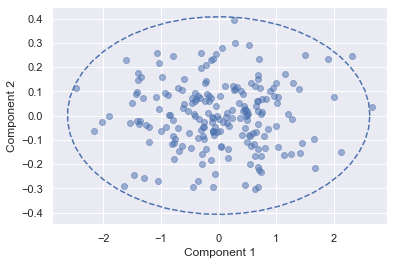

In [14]:
Z = pca.transform(X) # transform X to component space
plt.scatter(Z[:,0], Z[:,1], alpha=0.5) # scatter plot of data and specify transperancy
plt.xlabel('Component 1') # add x label
plt.ylabel('Component 2') # add y label
# plot the ellipse defined in the previous cell
plt.plot(Y[:,0],Y[:,1],'--');    # scaled by axis   pca ampitude

If we only calculate one principal component then the dimension of the data is reduced. Storage is therefore reduced or compressed and any machine learning algorithm that is applied to the data is then significantly more efficient, as there is now only one feature. 

In [15]:
pca = PCA(n_components=1) # instantatiate PCA to calculate the first PC
pca.fit(X) # fit the data
Y = pca.transform(X) # transform the data to component space
print('Original shape: ',X.shape) # print the size of the feature matrix
print('Transformed shape: ', Y.shape) # print the size of the component space matrix reduce storage

Original shape:  (200, 2)
Transformed shape:  (200, 1)


When we transform the reduced data back to the original feature space, we obtain an approximation to the original data where there is now only variation in the direction of the first principal component. Now

$$
X_j \approx Y_{1,j}P_1.
$$

However, as the first principal component accounts for 97.6% of the variance of the data, we are only losing a small amount of information. In the figure below the blue dots are the original data points and the orange dots are the approximation using only the first principal component. The other way to consider this is that the data is being projected onto the first principal component, i.e., each data point is moved to the closest point on the first principal component.

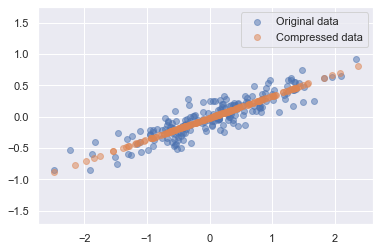

In [16]:
Z = pca.inverse_transform(Y) # transform the component space matrix back to feature space
plt.scatter(X[:,0], X[:,1], alpha=0.5, label='Original data') # scatter plot of the original data
plt.scatter(Z[:,0], Z[:,1], alpha=0.5, label='Compressed data') # scatter plot of the data using 1 PC
plt.legend() # add legend based on labels in scatter plots
plt.axis('equal'); # make the axis scales equal   compressed data follow one princle component lose variability with decreasing of component

In [17]:
Z[:,0]

array([-0.60566999,  1.0452307 , -0.65397264, -2.14785286, -0.56154772,
       -0.93407737, -0.70050728,  1.35251105,  0.30839673, -1.75023588,
        0.70553701, -0.56988901, -0.48410886,  0.24064357,  0.39976345,
       -0.64198517,  1.05705933,  0.31677176,  0.78610394,  0.80095021,
        1.48815318,  0.27238503, -0.55815912,  1.55416425, -0.44272351,
       -0.48965864, -0.61052642,  0.05241574, -0.07373257,  0.00590642,
        0.23599781,  1.01014146, -0.33353865, -0.90785815, -1.28140043,
       -0.39814794, -0.61045903,  0.88846853, -0.43335047, -0.55433106,
       -0.274466  , -0.39391363, -0.61045975,  0.26474655,  0.53138351,
        0.45988708,  1.3828097 , -0.72699891, -0.13748261, -0.29614212,
       -2.47689761,  1.30165949,  0.19692819, -0.54608162,  1.82742655,
        0.78253898,  0.42742008, -0.11279799, -0.19754732, -0.6524849 ,
        0.78113929, -0.38173615,  0.28533378,  0.86192768,  0.63555566,
        0.76356285,  1.02157187, -1.05459948,  0.08325276,  0.95

In [18]:
Z[:,1]

array([-0.22648439,  0.34794757, -0.24329133, -0.76308793, -0.21113202,
       -0.34075396, -0.25948309,  0.45486597,  0.09156571, -0.62473684,
        0.22975093, -0.21403438, -0.18418712,  0.06799096,  0.12335682,
       -0.23912028,  0.35206335,  0.09447981,  0.25778425,  0.26295002,
        0.50206274,  0.07903542, -0.20995296,  0.52503133, -0.16978706,
       -0.18611817, -0.22817419,  0.00249696, -0.04139642, -0.01368599,
        0.06637446,  0.33573825, -0.13179612, -0.33163096, -0.46160524,
       -0.15427696, -0.22815074,  0.29340207, -0.16652571, -0.20862098,
       -0.11124175, -0.15280363, -0.22815099,  0.07637761,  0.16915411,
        0.14427688,  0.46540841, -0.26870087, -0.06357829, -0.11878397,
       -0.87757926,  0.43717214,  0.05278016, -0.20575058,  0.62011313,
        0.25654382,  0.13297997, -0.05498926, -0.08447785, -0.24277367,
        0.25605679, -0.14856647,  0.08354094,  0.28416717,  0.20540088,
        0.24994106,  0.33971547, -0.3826897 ,  0.01322672,  0.31

In [19]:
Z

array([[-0.60566999, -0.22648439],
       [ 1.0452307 ,  0.34794757],
       [-0.65397264, -0.24329133],
       [-2.14785286, -0.76308793],
       [-0.56154772, -0.21113202],
       [-0.93407737, -0.34075396],
       [-0.70050728, -0.25948309],
       [ 1.35251105,  0.45486597],
       [ 0.30839673,  0.09156571],
       [-1.75023588, -0.62473684],
       [ 0.70553701,  0.22975093],
       [-0.56988901, -0.21403438],
       [-0.48410886, -0.18418712],
       [ 0.24064357,  0.06799096],
       [ 0.39976345,  0.12335682],
       [-0.64198517, -0.23912028],
       [ 1.05705933,  0.35206335],
       [ 0.31677176,  0.09447981],
       [ 0.78610394,  0.25778425],
       [ 0.80095021,  0.26295002],
       [ 1.48815318,  0.50206274],
       [ 0.27238503,  0.07903542],
       [-0.55815912, -0.20995296],
       [ 1.55416425,  0.52503133],
       [-0.44272351, -0.16978706],
       [-0.48965864, -0.18611817],
       [-0.61052642, -0.22817419],
       [ 0.05241574,  0.00249696],
       [-0.07373257,

### The iris dataset

To investigate PCA further, it is helpful to have more than two features. Therefore we will load the iris data set which was investigated in previous notebooks. Here it is loaded from the `sklearn` datasets, so we first view the keys for each component of the dataset.

In [20]:
from sklearn.datasets import load_iris

iris = load_iris() # load the iris data set
iris.keys() # display the labels for the components of the data set

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Recall that the features are the dimensions of the sepal and petal, and the targets are the three types of iris. These can be displayed by printing `feature_names` and `target_names`.

In [21]:
print('Feature names:',iris.feature_names) # print the feature names
print('Target names: ',iris.target_names) # print the target names

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


We can investigate how the three types of iris are separated in terms of the first two principal components. Recall that as there are four features, there will be four principal components. Fitting the data to the first two principal components, we see that these are vectors in four-dimensional space and both have length one. Each of the principal components can be thought of as a three-dimensional space embedded in four-dimensional space. The first principal component accounts for 92% of the variance in the data, while the second component accounts for 5% of the variance of the data.

In [22]:
X = iris.data # copy the iris features to an array 
y = iris.target # copy the iris target values to an array

pca = PCA(n_components=2)  # instantatiate PCA to calculate the first two PCs
X_pca = pca.fit_transform(X) # transform the data to component space
# loop over the string array, the principal components and the explained variance ratio
for ord, vector, ratio in zip(['First','Second'], pca.components_, pca.explained_variance_ratio_):
    print('{0} PC: {1}'.format(ord,vector)) # print the PC
    print('Length: ', np.round(np.linalg.norm(vector),3)) # print the length PC rounded to 3 figures
    # print the contribution to the variance rounded to 3 figures
    print('Explained variance ratio: ', np.round(ratio,3)) 

First PC: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Length:  1.0
Explained variance ratio:  0.925
Second PC: [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
Length:  1.0
Explained variance ratio:  0.053


In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Plotting the dataset in terms of the first two components, it is apparent that the data can largely be classified in terms of these two components. 

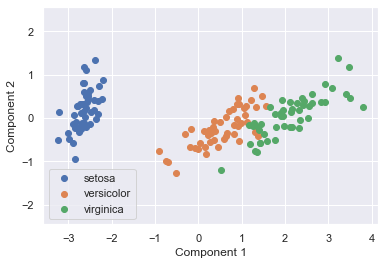

In [25]:
# loop over (0,2) and the iris target names
for i, target_name in zip(range(3), iris.target_names):
    # scatter plot of the component values which match the particular species
    # label this with the current target name
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend() # add a legend
plt.xlabel('Component 1') # add a x label
plt.ylabel('Component 2') # add a y label
plt.axis('equal'); # make the axis scales equal

As well as choosing the number of principal components we can choose the explained variance which we want to include in the model. `PCA` will then choose the number of principal components which account for that explained variance.

To understand this consider the explained variance for all the principal components for the iris data set. We can plot the effect of including up to the $n^{th}$ principal component, by calculating the sum of the explained variance ratios up to that component. This is known as the cumulative sum, and gives the proportion of the variance which is accounted for by including $n$ principal components. This is shown in the figure below, and for the iris model if we want to account for 95% of the variance, we need to include two principal components. 

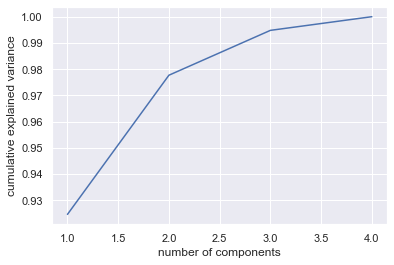

In [26]:
pca = PCA().fit(X) # fit the X data using PCA and calculate all PCs
# np.cumsum calculates the cumulative sum of an array
# plot the cumulative sum of the explained variance ratio against the number of components
plt.plot(range(1,5),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') # add x label
plt.ylabel('cumulative explained variance'); # add y label

To specify the proportion of variance that is accounted for, we can set `n_components` to a floating number between 0 and 1. Then `PCA` will calculate the number of principal components required to account for this variance. If we set this equal to 0.95, i.e., account for 95% of the variance, then from the shape of the transformed array it can be seen that two principal components are calculated, as expected.

In [27]:
# instantatiate PCA and calculate sufficient PCs such that 95% of the variance is accounted for 
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X) # transform the data to component space
print("original shape: ",X.shape) # print the size of the feature matrix
# print the size of the component matrix to show the number of components calculated
print("transformed shape:", X_pca.shape) 

original shape:  (150, 4)
transformed shape: (150, 2)


This data set can be transformed back into feature space and compared against the first two features of the iris data. As is apparent, some information is lost by only using two principal components, however the approximation is reasonably accurate.

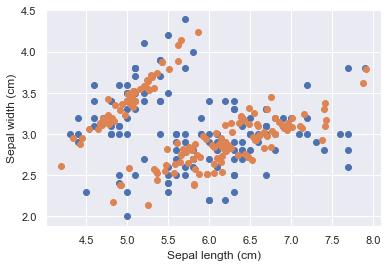

In [28]:
plt.scatter(X[:, 0], X[:, 1]) # scatter plot of the original data
Z = pca.inverse_transform(X_pca) # transform from component space back to feature space
plt.scatter(Z[:, 0], Z[:, 1]) # plot the projection of the data using 2 PCs
plt.xlabel('Sepal length (cm)') # add a x label
plt.ylabel('Sepal width (cm)'); # add a y label 

### Image processing

Finally, we investigate how PCA can be used for processing images. The `sklearn` digits dataset consists of a collection of 1,797 handwritten numbers from 0 to 9 each digitised onto an 8x8 grid of pixels. Hence we have 1,797 samples and 64 features. The targets are the number each image corresponds to. These can be used for training machine learning algorithms in image recognition. By printing the keys we can see the labels for each component of the dataset.

In [29]:
from sklearn.datasets import load_digits

digits = load_digits() # load the digits data set
digits.keys() # display the labels for the components of the data set

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
digits.data.shape # display the size of feature matrix

(1797, 64)

To understand the format of the images we can plot the first 40 together with the target values shown in the lower left side of the image.

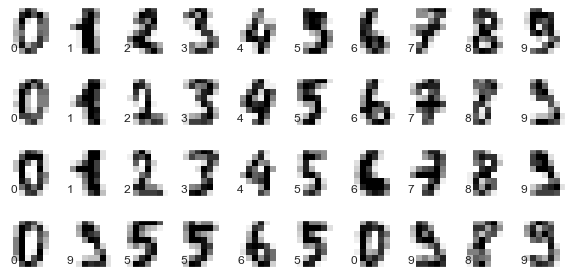

In [31]:
fig = plt.figure(figsize=(10,5)) # set up a figure of size 10 x 5

for i in range(40): # loop over the first 40 images
    # on a 4 x 10 grid add the next plot with no xticks or yticks
    ax = fig.add_subplot(4,10,i+1,xticks=[],yticks=[]) 
    ax.imshow(digits.images[i], cmap=plt.cm.binary) # plot the image i of the digits and use binary colourmap
    ax.text(0,7,str(digits.target[i])) # add the target value in the lower left corner

We will first use `PCA` to undertake some simple unsupervised learning by plotting the classifications of the digits against the first three components. This reveals that each of the classes occupies a distinct region in the component space. This could then be used in conjunction with a regression algorithm to obtain an approximate classification of the images.

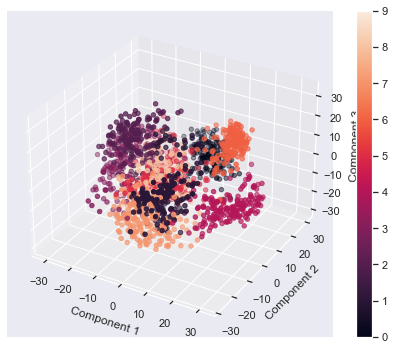

In [32]:
from mpl_toolkits import mplot3d # import function to enable 3-dimensional plotting in matplotlib

pca = PCA(n_components=3) # instantatiate PCA with 3 PCs
projected = pca.fit_transform(digits.data) # fit the data and transform to component space

fig = plt.figure(figsize=(8,6)) # set up a figure of size 8 x 6
ax = plt.subplot(projection='3d') # initialize the 3d axes
# 3d scatter plot with points coloured by their targets values
p = ax.scatter3D(projected[:,0], projected[:,1], projected[:,2], c=digits.target)
ax.set_xlabel('Component 1') # add x label
ax.set_ylabel('Component 2') # add y label
ax.set_zlabel('Component 3') # add z label
fig.colorbar(p); # add colourbar to p

For images the principal components can be interpreted as individual images. Each of these contribute to the variance of the collection of images. To illustrate this we can plot the 64 principal components in order of their contribution the variance. This is shown below where decreasing variance corresponds to left to right and then top to bottom. For the first few principal components there is information on almost every pixel, apart from the sides, but then as the importance decreases the amount of information decreases until the last row, where only one or two pixels are of importance for each principal component.

Each individual sample can then be reconstructed from these principal components given their values in component space. If we denote each of the principal components as $P_1$, $P_2$, $\dots$, $P_{64}$ and the values in component space for the $j^{th}$ sample as $Y_{1,j}$, $Y_{2,j}$, $\dots$, $Y_{64,j}$, then

$$
X_j = Y_{1,j}P_1 + Y_{2,j}P_2 + \cdots + Y_{64,j}P_{64}.
$$

If we only have $n$ principal components and we are projecting the data onto these components, then

$$
X_j \approx Y_{1,j}P_1 + Y_{2,j}P_2 + \cdots + Y_{n,j}P_{n}.
$$


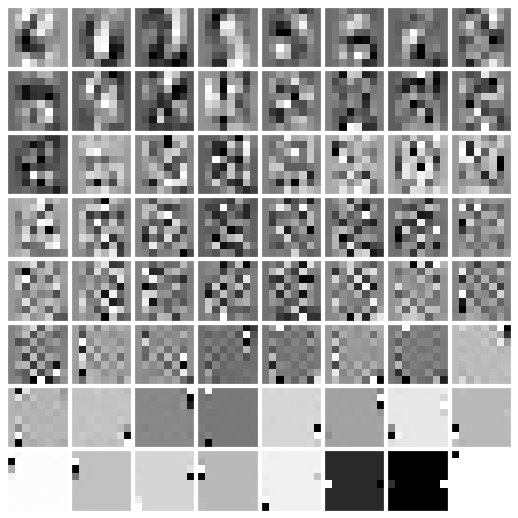

In [33]:
pca = PCA() # instantatiate PCA and calculate all PCs
pca.fit(digits.data) # fit the digits data to PCA
fig = plt.figure(figsize=(7, 7)) # set up a 7 x 7 figure
# create some horizontal space and whitespace between the subplots
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05) 

for i in range(64): # loop over all the PCs
    # on a 8 x 8 grid add the next plot with no xticks or yticks
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    # reshape the current PC into an 8 x 8 grid, plot as an image and use binary colourmap
    ax.imshow(np.reshape(pca.components_[i,:],(8,8)), cmap=plt.cm.binary)

If we view the cumulative explained variance, we see that 95% of the variance is accounted for by around 30 components.

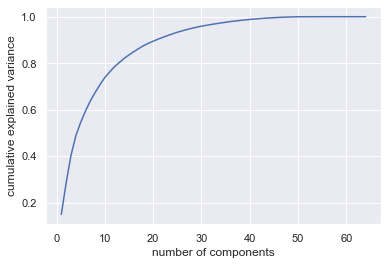

In [34]:
# plot the cumulative sum of the explained variance ratio against the number of components
plt.plot(range(1,65),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') # add x label
plt.ylabel('cumulative explained variance'); # add y label

To test this we can set `n_components` to 0.95 and PCA returns 29 components.

In [35]:
# instantatiate PCA and calculate suffient PCs such that 95% of the variance is accounted for 
pca = PCA(n_components=0.95)
digits_pca = pca.fit_transform(digits.data) # fit the digits data and transform to component space
# print the shape of the component matrix to show number of components used
print('Shape of transformed data: ',digits_pca.shape) 

Shape of transformed data:  (1797, 29)


If we reconstruct the digits with 29 modes and compare them with the original images, it is apparent that less than half of the components are reasonably able to model the digits.

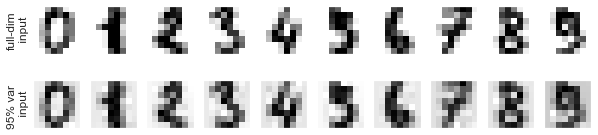

In [36]:
rdigits = pca.inverse_transform(digits_pca) # transform the component matrix back to feature space

# intialize a 2 x 10 grid of plots on 10 x 2.5 figure
# pass keywords to subplots so that don't have xticks or yticks
fig, ax = plt.subplots(2,10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]})

for i in range(10): # loop over (0,9)
    # reshape the digits data to a 8 x 8 matrix, plot as an image on the first row and use binary colourmap
    ax[0,i].imshow(digits.data[i].reshape(8,8), cmap='binary')
    # reshape the reduced digits data to a 8 x 8 matrix, plot as an image on the second row 
    # and use binary colourmap
    ax[1,i].imshow(rdigits[i].reshape(8,8), cmap='binary')
    
ax[0,0].set_ylabel('full-dim\n input') # label for the first row
ax[1,0].set_ylabel('95% var \n input'); # label for the second row


Amongst other applications PCA can also be used to filter noisy data. Since noise is random the correlation across images will be very low, therefore the principal components associated with the noise signal will have minimal effect on the variance of the feature matrix. Hence if we choose a relatively low cutoff for the proportion of variance that we want the principal components to account for, this will remove much of the random noise. In the example below we choose a cutoff of 60%, which removes much of the noise which was added to the images.

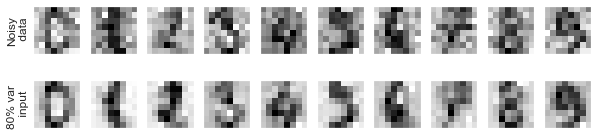

In [37]:
np.random.seed(42) # initialize a random number generator
noisy = np.random.normal(digits.data, 4) # add normally distributed noise of amplitude 4 to the digits data
# instantatiate PCA and calculate suffient PCs such that 60% of the variance is accounted for 
pca = PCA(0.6) 
digits_pca = pca.fit_transform(noisy) # fit the noisy data to the current model
rdigits = pca.inverse_transform(digits_pca) # transform the component matrix back to feature space
# intialize a 2 x 10 grid of plots on 10 x 2.5 figure
# pass keywords to subplots so that don't have xticks or yticks
fig, ax = plt.subplots(2,10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]})
for i in range(10): # loop over (0,9)
    # reshape the noisy digits data to a 8 x 8 matrix, plot as an image on the first row and use binary colourmap
    ax[0,i].imshow(noisy[i].reshape(8,8), cmap='binary') 
    # reshape the filtered noisy digits data to a 8 x 8 matrix, plot as an image on the second row 
    # and use binary colourmap
    ax[1,i].imshow(rdigits[i].reshape(8,8), cmap='binary')
    
ax[0,0].set_ylabel('Noisy\n data') # label for the first row
ax[1,0].set_ylabel('80% var \n input'); # label for the second row

## Exercises

For these exercises we will use the Wisconsin Breast Cancer Dataset from `sklearn`. This is the analysis of 30 properties of breast cancer cells, which have the classification of 'malignant' (0) or 'benign' (1).

In [55]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

wdbc = load_breast_cancer()
X = pd.DataFrame(wdbc.data, columns=wdbc.feature_names)
y = pd.Series(wdbc.target)

In [39]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

### Exercise 1

Calculate the first two principal components for this dataset and plot the data points in terms of these two components, coloured by the target values. (2 marks)

In [41]:
first_two_pc=X.iloc[:, [0,1]]#select first two components
first_two_pc

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [46]:
pca = PCA(n_components=2)  # instantatiate PCA to calculate the first two PCs
X_pca = pca.fit_transform(X) # transform the data to component space
# loop over the string array, the principal components and the explained variance ratio
for ord, vector, ratio in zip(['First','Second'], pca.components_, pca.explained_variance_ratio_):
    print('{0} PC: {1}'.format(ord,vector)) # print the PC
    print('Length: ', np.round(np.linalg.norm(vector),3)) # print the length PC rounded to 3 figures
    # print the contribution to the variance rounded to 3 figures
    print('Explained variance ratio: ', np.round(ratio,3)) 

First PC: [ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
  4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
  7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
  2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
  8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
  7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
  6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
  1.78986262e-05  1.61356159e-06]
Length:  1.0
Explained variance ratio:  0.982
Second PC: [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
 -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
 -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
  8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
  2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
 -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
 -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05

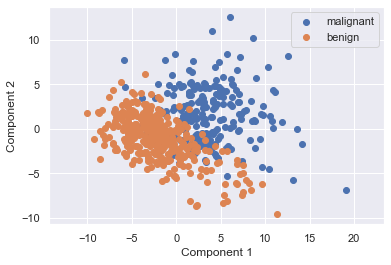

In [49]:

for i, target_name in zip(range(3), wdbc.target_names):
    # scatter plot of the component values which match the particular species
    # label this with the current target name
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend() # add a legend
plt.xlabel('Component 1') # add a x label
plt.ylabel('Component 2') # add a y label
plt.axis('equal'); # make the axis scales equal

### Exercise 2

Repeat the plot from Exercise 1, but in this case plot the projection of the data on to the first two principal components. (2 marks)

In [50]:
first_two_pc

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [51]:
pca = PCA(n_components=2)  # instantatiate PCA to calculate the first two PCs
X_pca = pca.fit_transform(first_two_pc) # transform the data to component space
# loop over the string array, the principal components and the explained variance ratio
for ord, vector, ratio in zip(['First','Second'], pca.components_, pca.explained_variance_ratio_):
    print('{0} PC: {1}'.format(ord,vector)) # print the PC
    print('Length: ', np.round(np.linalg.norm(vector),3)) # print the length PC rounded to 3 figures
    # print the contribution to the variance rounded to 3 figures
    print('Explained variance ratio: ', np.round(ratio,3)) 

First PC: [0.48651773 0.8736707 ]
Length:  1.0
Explained variance ratio:  0.687
Second PC: [ 0.8736707  -0.48651773]
Length:  1.0
Explained variance ratio:  0.313


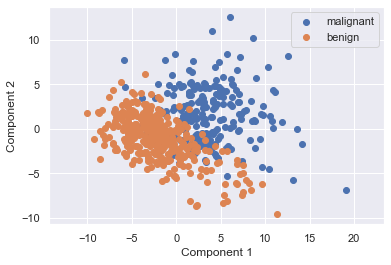

In [53]:
for i, target_name in zip(range(3), wdbc.target_names):
    # scatter plot of the component values which match the particular species
    # label this with the current target name
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend() # add a legend
plt.xlabel('Component 1') # add a x label
plt.ylabel('Component 2') # add a y label
plt.axis('equal'); # make the axis scales equal

Calculate and plot the cumulative explained variance as a function of the number of principal components. How many principal components are required to account for 99% of the variance? (2 marks)

In [61]:
pca = PCA(n_components=1) # instantatiate PCA to calculate the first PC
pca.fit(X) # fit the data
Y = pca.transform(X) # transform the data to component space
print('Original shape: ',X.shape) # print the size of the feature matrix
print('Transformed shape: ', Y.shape) # print the size of the component space matrix reduce storage

Original shape:  (569, 30)
Transformed shape:  (569, 1)


In [69]:
Y

array([[ 1.16014257e+03],
       [ 1.26912244e+03],
       [ 9.95793889e+02],
       [-4.07180803e+02],
       [ 9.30341180e+02],
       [-2.11591259e+02],
       [ 8.21210900e+02],
       [-2.50899776e+01],
       [-1.91292834e+02],
       [-2.38292863e+02],
       [ 3.04687818e+02],
       [ 4.24361128e+02],
       [ 6.34514335e+02],
       [ 6.30426906e+01],
       [-1.96441210e+02],
       [ 5.60046828e+01],
       [ 2.35858120e+02],
       [ 4.47392780e+02],
       [ 1.61509345e+03],
       [-1.91621045e+02],
       [-2.85051275e+02],
       [-6.83583952e+02],
       [ 1.12560459e+02],
       [ 1.87373312e+03],
       [ 1.27373066e+03],
       [ 6.34879769e+02],
       [ 8.59184126e+00],
       [ 6.77784526e+02],
       [ 3.73719881e+02],
       [ 4.53678089e+02],
       [ 9.03981279e+02],
       [-1.03689312e+02],
       [ 5.24945203e+02],
       [ 1.06217159e+03],
       [ 4.04385934e+02],
       [ 4.10049756e+02],
       [-8.06577946e+01],
       [-3.55877850e+02],
       [-1.2

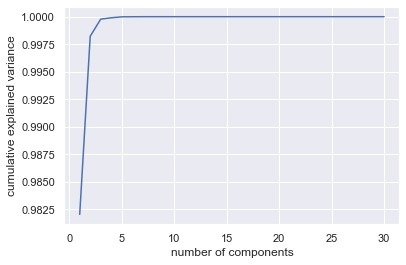

In [60]:
pca = PCA().fit(X) # fit the X data using PCA and calculate all PCs
# np.cumsum calculates the cumulative sum of an array
# plot the cumulative sum of the explained variance ratio against the number of components
plt.plot(range(1,31),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') # add x label
plt.ylabel('cumulative explained variance'); # add y label

Number of components for 99% variance is:

In [ ]:
2

### Exercise 4

Model this data using a logistic regression model, with `solver='liblinear'` and an 80/20 testing/training split. Calculate the accuracy of the model using two principal components and all the data features. Also calculate the elapsed time taken for each model run using the magic command `%%timeit`. To use `%%timeit` in cell-mode, put the code that you want to time in a separate cell with `%%timeit` as the first line in the cell. (4 marks)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Calculations for full logistic regression.

In [63]:
X_train1,X_test1,y_train1,y_test1= train_test_split(X,y,train_size=0.8,random_state=0)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train1,y_train1)
print('Model coefficient:',np.round(logreg.coef_,3))
print('Model intercept:',np.round(logreg.intercept_,3))

Model coefficient: [[ 1.837  0.098  0.052 -0.005 -0.125 -0.367 -0.528 -0.267 -0.238 -0.026
   0.026  0.994  0.137 -0.108 -0.007 -0.012 -0.046 -0.029 -0.035  0.005
   1.463 -0.304 -0.228 -0.022 -0.213 -1.162 -1.551 -0.542 -0.622 -0.124]]
Model intercept: [0.369]


In [64]:
%%timeit
X_train1,X_test1,y_train1,y_test1= train_test_split(X,y,train_size=0.8,random_state=0)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train1,y_train1)


9.22 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Calculate accuracy for full logistic regression.

In [68]:
y_pred=logreg.predict(X_test1)
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy",np.round(accuracy_score(y_test1,y_pred),3))

Accuracy 0.956


Calculations for logistic regression with PCA.

In [ ]:
choose the component you want, transform your data into into princle comonent set, do logistic regression of number of components

In [70]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train_PCA = sc.fit_transform(X_train1) 
X_test_PCA = sc.transform(X_test1)

In [71]:
print(X_train_PCA.shape)
print(X_test_PCA.shape)

(455, 30)
(114, 30)


In [73]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train_PCA2 = pca.fit_transform(X_train_PCA) 
X_test_PCA2 = pca.transform(X_test_PCA) 
pca.fit(X_train_PCA2)
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.68751244, 0.31248756])

Calculate accuracy for logistic regression with PCA.

In [76]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid2 = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid2.fit(X_train1, y_train1) 
y_pred_LRC2 = LR_Grid2.predict(X_test1)

C:\Users\wsm\Downloads\a\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall Training data:      0.969
Precision Training data:   0.959
----------------------------------------------------------------------
Recall Test data:          0.9254
Precision Test data:       0.9688
----------------------------------------------------------------------
Confusion Matrix Test data
[[45  2]
 [ 5 62]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.97      0.93      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



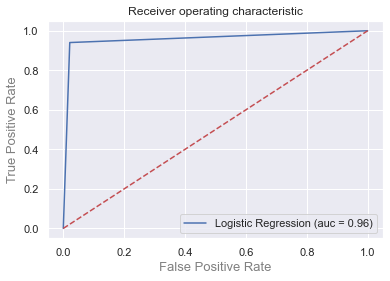

auc 0.9595109558590028


In [78]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(y_train1, LR_Grid2.predict(X_train1)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(y_train1, LR_Grid2.predict(X_train1)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(y_test1, LR_Grid2.predict(X_test1)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(y_test1, LR_Grid2.predict(X_test1)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(y_test1, LR_Grid2.predict(X_test1)))
print("----------------------------------------------------------------------")
print(classification_report(y_test1, LR_Grid2.predict(X_test1)))
y_pred_proba = LR_Grid2.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred)
auc = metrics.roc_auc_score(y_test1, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)